# Quick Tutorial on Sampling

Sampling is easiest to understand in one dimension in time. Let us use a simple cosine function to demonstrate.

* Our function to evaluate is: $f(t) = \cos(\omega t)$

We will configure the cosine function at 10 Hertz and study one second of its output. 

* Set frequency, $f=10$

* Use as angular frequency, $\omega = 2\pi f$

The sampling interval for the function also needs to be provided. This is the time elapsed between samples.

Conventional sampling ([Nyquist Sampling Theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)) states that the minimum sampling interval required to capture a given frequency event should be no less than double the frequency. In other words, sample twenty times per second if your want to digitize a signal that cycles ten times per second.

* Set the Nyquist sampling interval, $smpInt = \frac{1}{2 f}$

We can plot the 10 Hz cosine function using the code below...

In [1]:
%matplotlib inline
import numpy as np
from math import pi
import matplotlib.pyplot as plt

# Set the frequency of the function in Hertz
f = 10

# Convert the frequency to angular frequency
omega = 2*pi*f

# Declare the sampling interval in seconds
smpInt = 1/(2*f)

# Create a time series
min_t = -2
max_t = 2
t = np.arange(min_t, max_t, smpInt)
amplitude = np.cos(omega*t)

(0, 1)

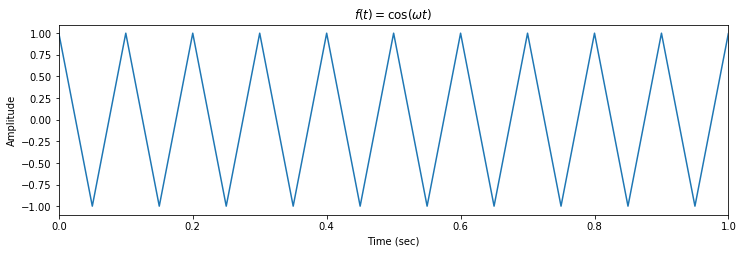

In [2]:
# Plot the time series
fig1 = plt.figure(figsize=(12,3.5))
plt.plot(t, amplitude)
plt.title(r'$f(t)=\cos(\omega t)$')
plt.gca().set_xlabel('Time (sec)')
plt.gca().set_ylabel('Amplitude')
plt.gca().set_xlim((0,1))

We do see about ten oscilations but the cosine function seems a little pointy, no? The short explanation is that Nyquist sampling ignores the waveform. The minimal sampling interval preserves only the frequency and not the waveform. We must sample faster if we want the waveform. 

Let us sample the same cosine function 100 times faster and compare.

(0, 0.2)

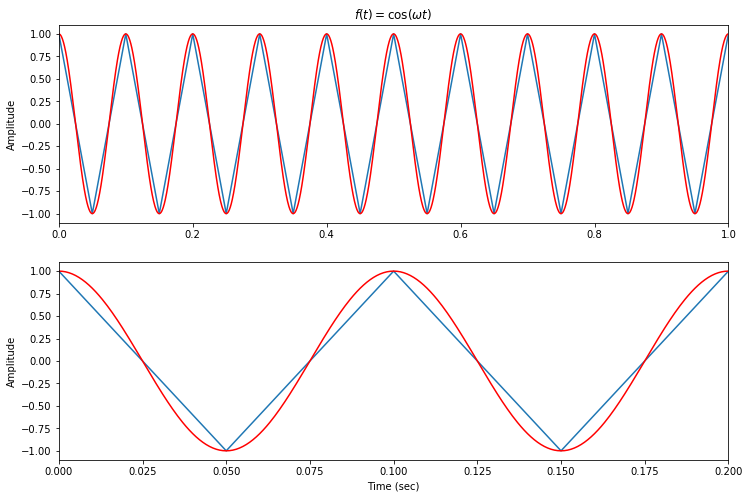

In [3]:
t_100 = np.arange(min_t, max_t, smpInt/100)
amplitude_100 = np.cos(omega*t_100)

# Plot the time series
fig2 = plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(t, amplitude)
plt.plot(t_100, amplitude_100, '-r')
plt.title(r'$f(t)=\cos(\omega t)$')
plt.gca().set_ylabel('Amplitude')
plt.gca().set_xlim((0,1))

# Plot a zoomed version of the time series
plt.subplot(2,1,2)
plt.plot(t, amplitude)
plt.plot(t_100, amplitude_100, '-r')
plt.gca().set_xlabel('Time (sec)')
plt.gca().set_ylabel('Amplitude')
plt.gca().set_xlim((0,0.2))

Now that is more like it! So the looming question...

* **How much sampling is too much sampling and how little is too little?**

Error introduced by sampling is known as aliasing. Choosing too high is fine if you have the resources to support the extra computational overhead in processing unnecessary samples. Choosing too low or even at the wrong high interval may lead to aliasing, phase shifting and overall distortion. 

In practice, I find that using **sampling ten times faster than Nyquist is suitable for most applications**. Let us look at how this unfolds in our cosine example.

In [4]:
# Create the real signal for comparison
t_full = np.arange(min_t, max_t, smpInt/1000)
amplitude_full = np.cos(omega*t_full)

# Plot the time series
fig3 = plt.figure(figsize=(12,3.5))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Amplitude')
ax.set_xlim((0,0.5))
txt_title = ax.set_title(r'$f(t)=\cos(\omega t)$')
plt.plot(t_full, amplitude_full, lw=6)

# Set placholders for the animation
line, = plt.plot([], [], color='red', lw=2)
point, = plt.plot([], [], '.k', markersize=16)

# Hide the plot so the animation is the only output
plt.close()

# Create a list of sampling intervals to try
# the line below creates logorithmically spaced values between 1-20
smpInts = np.logspace(0,1.30102999566,1000)

from matplotlib import animation
from IPython.display import HTML

# animation function. This is called sequentially
def drawframe(n):
    t_new = np.arange(min_t, max_t, 1/(2*smpInts[n]*f))
    amplitude_new = np.cos(omega*t_new)
    txt_title.set_text(r'$f(t)=\cos(\omega t)$' + ', Nyquist x {0:0.2f}'.format(smpInts[n]))
    line.set_data(t_new, amplitude_new)
    point.set_data(t_new, amplitude_new)
    return line, point

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig3, drawframe, frames=len(smpInts), interval=60, blit=True)

HTML(anim.to_html5_video())

We can see that minimum sampling must be exact when sampling according to sampling theorem and that greater values are rather unpredictable until we start sampling approximately ten times the minimum (*10x Nyquist)*.